Question 3


The Associated Legendre Dif-Eq is given by:

$$(1-x^2)\frac{d^2y_{n, m}(x)}{dx^2} - 2x\frac{dy_{n, m(x)}}{dx} + \bigg[n(n + 1) - \frac{m^2}{1 - x^2}\bigg]y_{n, m}(x) = 0$$
Boundary Conditions:

$y_{n, 0}(1.0) = 1.0$, $y_{n, 0}(-1) = \pm 1$ based on if n is even or odd
and
$y_{n, m}(1.0) = y_{n, m}(-1.0) = 0.0$ for $m > 0$


A. Using the code for general second order linear differential equations, set up and solve the Associated Legendre Dif-Eq for the given boundary on the domain [-1, 1] for $n = (1, 2, 3, 4, 5, 6)$, and $m = (0, 1, 2)$ for $0 \leq m \leq n$.

B. Plot your answers and compare them to analytically calculated Associated Legendre polynomials

HINT: (there is a singularity you need to worry about. Look into dealing with this)

The singularity at $\pm 1$ causes errors in $m = 1$, and $m = 2$
Resolution, isolate $y''$ according to Mathematical Methods for Physicists, Arfken, Chapter 15.4 pg 741:
$$y''(x) - \frac{2x}{(1 - x^2)}y'(x) + \bigg[\frac{n(n + 1)}{(1 - x^2)} - \frac{m^2}{(1 - x^2)^2}\bigg]y(x) = 0$$

Let $x = \pm 1 + z$ for $z << 1$ such that $1 - x^2 = \mp2z$

Substituting into the original:
$$(\mp2z)y''(x) - 2(\pm1 + z)y'(x) + \bigg[n(n + 1) - \frac{m^2}{\mp2z}\bigg]y(x) = 0$$

$\frac{m^2}{\mp2z}$ diverges, taking $n(n + 1)$ to $0$ in the third term, and $z << 1$ in the second term. 

$$(\mp2z)y''(x) \mp 2y'(x) \pm \bigg[\frac{m^2}{2z}\bigg]y(x) = 0$$

Multiplying by $\frac{\mp z}{2}$ we recover an Euler Equation

$$z^2y''(x) + zy'(x) - \bigg[\frac{m^2}{4}\bigg]y(x) = 0$$

Solving this, we end with an approximate solution:
$$y(x) = z^{\pm m / 2}$$

The general solution then should have the form:

$$y(x) = (1 - x^2)^{\pm m / 2}v(x)$$

Rewriting the Polynomial in terms of $v(x), v'(x), v''(x)$ gives us:
$$(1 - x^2)v''(x) - 2x(m + 1)v'(x) + (n(n + 1) - m(m + 1))v(x) = 0$$ 

Note for our case, $m = 0, 1, 2$, so we will use $+m$ for this solution

Thus we use the coefficients to rid us of the singularity
coef1: $$(1 - x^2)$$
coef2: $$-2x(m + 1)$$
coef3: $$n(n + 1) - m(m + 1)$$

Using the solution to this differential equation $v(x)$, we can solve for $y(x)$

Note: Although modified to be more explicit, credit to my professor, Sagar Pandit, for providing initial templates/guide code for the linear solver method.  
In the case of this solution, we successfully plot the Associated Legendre with one caviot. The scale of the graphs are off. For $m = 1$ the amplitude should be inverted. This is fixed using a roundabout way. It appears to dampen with increasing $n$ values. For $m = 2$ similarly, the waves dampen with increasing $n$ values. Either way, it is clear to see the polynomials when comparing with the actual polynomials.

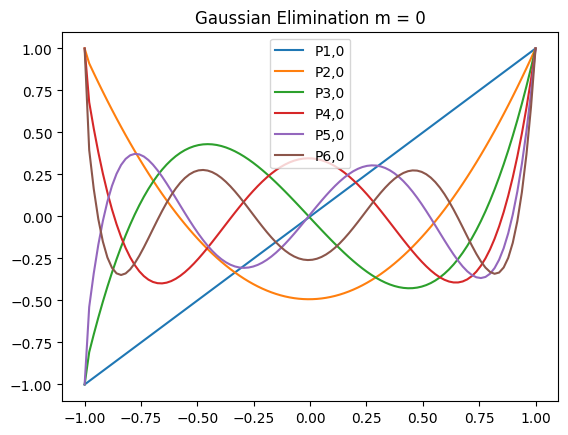

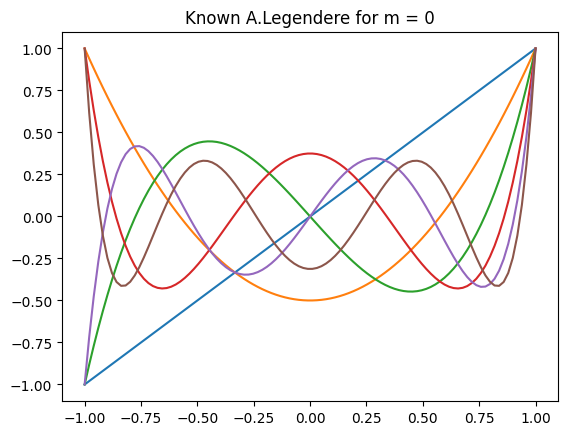

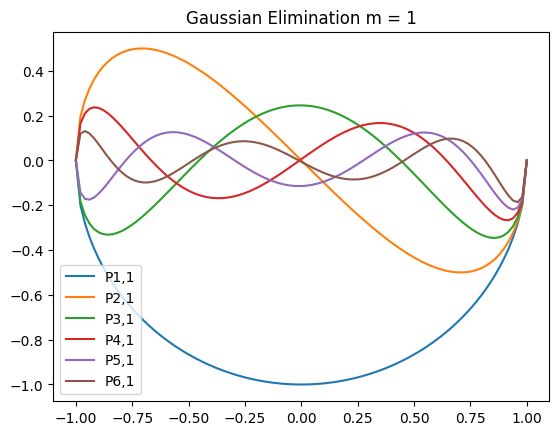

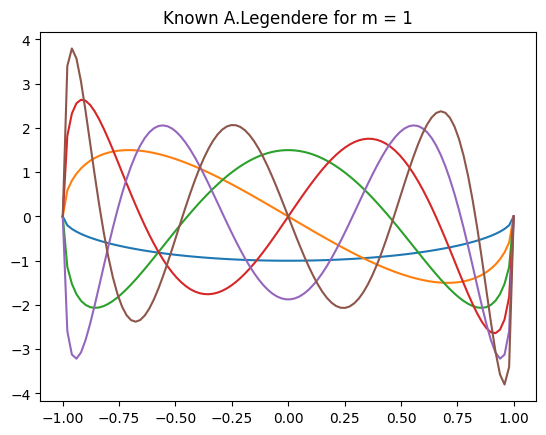

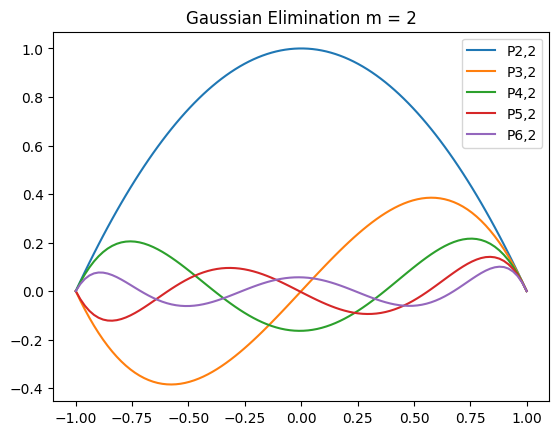

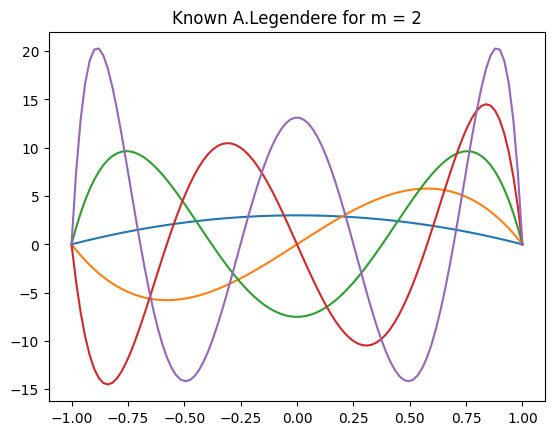

In [1]:
import numpy as np
import matplotlib.pyplot as plt
"""
This code uses a linear solver discussed in class via the gaussian method. This code has been modified to be more concise with this particular problem. The associated_legendre polynomial follows a path:
associated(n, m) -> general_linear solver(start_bound+eps, end_bound-eps, no_pts, p(x), q(x), r(x) bc = {N-1:1.0} if, else.) -> gaussian elimination(matrix, b_vector) -> upper_triangle(matrix, b_vector) -> back_substitution(matrix) -> associated output.
"""


def echelon_triangularization(matrix, vector):
    """
    This function accepts a matrix element and a vector and reduces it to an upper echelon triangular matrix
    :param matrix: numpy array matrix representing the input differential equation
    :param vector: numpy array zero array representing the homogeneity
    :return: numpy array triangular matrix
    """
    tri_mat = np.column_stack((matrix, vector)) # combines matrix and vector to be manipulated together
    for i in range(len(tri_mat)):               # indexes the rows to be operated on
        if tri_mat[i][i] == 0:                  # checks for zeros
            if i < len(tri_mat) - 1:            # ignores b vector
                for k in range(len(tri_mat)):   
                    mat = tri_mat[i][k]                 # makes a temporary matrix to be operated on
                    tri_mat[i][k] = tri_mat[i+1][k]     # updates indices 
                    tri_mat[i+1][k] = mat               # updates the matrix
        else:
            diag = tri_mat[i][i]                # find diagonal terms if non-zero
            for k in range(i+1, len(tri_mat)):
                tri_mat[k] = tri_mat[k] - tri_mat[i]*tri_mat[k][i]/diag     # updates terms beneath non-zero element
    return tri_mat      
                    

def back_substitution(triangular_matrix, fixed=None):
    term = len(triangular_matrix)
    x_val = np.zeros(term)
    x_val[term-1] = triangular_matrix[term - 1][term]/triangular_matrix[term - 1][term - 1] 
    
    if fixed != None:
        for i in fixed:
            if i == term - 1:
                x_val[term - 1] = fixed[i]
         
    for j in range(term-2, -1, -1):
        s = 0
        for k in range(j+1, term):
            s += triangular_matrix[j][k] * x_val[k]
        s = triangular_matrix[j][term] - s
        
        s /= triangular_matrix[j][j]
        x_val[j] = s
        
        if fixed != None:
            for i in fixed:
                if i == j:
                    x_val[j] = fixed[i]
    #print(f'x_vals{x_val}')
    return x_val


def gaussian_elimination(matrix, vector, fixed=None):
    upper_echelon_matrix = echelon_triangularization(matrix, vector)    # gets the triangular matrix and passes it to be solved
    #print(f'mat={upper_echelon_matrix}')
    return back_substitution(upper_echelon_matrix, fixed) 


def general_linear_solver(start_bound, end_bound, N, coef1, coef2, coef3, bc):
    dx = (end_bound - start_bound) / (N - 1)          # incrementation/ step size
    dif_matrix = np.zeros((N, N))                       # sets up zero matrix to be filled
    b_vector = np.zeros(N)                              # sets up b vector to be filled (zeros if homogeneous)
    x_array = np.zeros(N)                               # resulting x values to be filled
    
    for pt in range(N):
        x_array[pt] = start_bound + dx * pt           # assigns a values to x array and matrix
        dif_matrix[pt][pt] = -2*coef1(x_array[pt]) - coef2(x_array[pt])*dx + coef3(x_array[pt])*dx**2     
        try:
            dif_matrix[pt][pt + 1] = coef1(x_array[pt]) + coef2(x_array[pt])*dx   # attempts to assign values if needed
        except Exception as e:
            pass
        
        if pt > 0:
            dif_matrix[pt][pt - 1] = coef1(x_array[pt])
        
    y_array = gaussian_elimination(dif_matrix, b_vector, fixed=bc)
    return x_array, y_array


def associated_legendre(n, m, a0):
    """
    This function takes in the degree of a Legendre Polynomial an outputs the xy-arrays representing said inputs
    :param n: integer valued index associated with LP
    :param m: integer valued index associated with LP
    :param a0: arbitrary coefficient
    :return: x array, y array data for LP
    """
    epsillon = 1e-9                 # small change to ensure boundary conditions are valid
    pts = 100                       # number of terms/points for the graph
    bc = {pts - 1: 1.0}             # creates a dictionary for the points
    if n % 2 == 0:                  # checks for the singularity
        bc.update({0:1.0})          # if singularity at 1.0, change to 0 rather than und
    else:
        bc.update({0:-1.0})         # else if singularity at -1.0, change to 0 as well.
    
    starting_bound = -1.0 + epsillon        
    ending_bound = 1.0 - epsillon
                                        # coefficients of Associated Legendre Dif eq: y(x)
    px = lambda x: 1 - x**2
    qx = lambda x: -2*x
    rx = lambda x: (n*(n + 1) - m**2/(1 - x**2))
    # solution for y(x), no singularity as m = 0 
    x_values_of_y, y_values_of_y = general_linear_solver(starting_bound, ending_bound, pts, px, qx, rx, bc)

    if m != 0:
        # coefficients of modified Dif eq: v(x), with removed singularity as derived above
        # inputs for v(x) differential equation
        px = lambda x: 1 - x**2
        qx = lambda x: -2*x*(m + 1)
        rx = lambda x: n*(n + 1) - m*(m+1)
    
        # inputs terms into linear solver for y(x) or v(x)
        x_values_of_v, y_values_of_v = general_linear_solver(starting_bound, ending_bound, pts, px, qx, rx, bc)
        
        if m == 1:  # round about fix for the inverted graph
            y_values_of_v = -y_values_of_v
            
        y_values_of_y = a0*(1 - x_values_of_v**2)**(m/2)*y_values_of_v  # uses v(x) to get y(x)
        x_values_of_y = x_values_of_v
        #print(y_values_of_v)
    return x_values_of_y, y_values_of_y 
    

if __name__ == '__main__':
    # arbitrary coefficient
    a0 = 1
    #gaussian test n values
    n = [1, 2, 3, 4, 5, 6]
    # plot known polynomials on domain: x = [-1, 1]
    x_values = np.linspace(-1.0, 1.0, 100)
    
    # gaussian
    for i in n:
        x, y = associated_legendre(i, 0, a0)
        plt.plot(x, y, label=f'P{i},{0}')
    plt.title('Gaussian Elimination m = 0')
    plt.legend()
    plt.show()
    
    # known
    # m = 0
    P10 = []
    P20 = []
    P30 = []
    P40 = []
    P50 = []
    P60 = []
    for x in x_values:
        P10.append(x)
        P20.append(0.5*(3*x**2 - 1))
        P30.append(0.5*(5*x**3 - 3*x))
        P40.append(0.125*(35*x**4 - 30*x**2 + 3))
        P50.append(0.125*(63*x**5 - 70*x**3 + 15*x))
        P60.append(0.0625*(231*x**6 - 315*x**4 + 105*x**2 - 5))
    y_values = [P10, P20, P30, P40, P50, P60]
    for poly in y_values:
        plt.plot(x_values, poly)
    plt.title("Known A.Legendere for m = 0")
    #plt.legend()
    plt.show()
    
    # gaussian
    for i in n:
        x, y = associated_legendre(i, 1, a0)
        plt.plot(x, y, label=f'P{i},{1}')
    plt.title('Gaussian Elimination m = 1')
    plt.legend()
    plt.show()
    
    # known
    # m = 1
    P11 = []
    P21 = []
    P31 = []
    P41 = []
    P51 = []
    P61 = []
    for x in x_values:
        P11.append(-(1-x**2)**0.5)
        P21.append(-3*x*(1-x**2)**0.5)
        P31.append(1.5*(1-5*x**2)*(1-x**2)**0.5)
        P41.append(-2.5*(7*x**3 - 3*x)*(1-x**2)**0.5)
        P51.append(-1.875*(21*x**4-14*x**2+1)*(1-x**2)**0.5)
        P61.append(-2.625*(33*x**5 - 30*x**3 + 5*x)*(1-x**2)**0.5)
    y_values = [P11, P21, P31, P41, P51, P61]
    for poly in y_values:
        plt.plot(x_values, poly)
    plt.title("Known A.Legendere for m = 1")
    #plt.legend()
    plt.show()
    
    m = [2, 3, 4, 5, 6]
    # gaussian
    for i in m:
        x, y = associated_legendre(i, 2, a0)
        plt.plot(x, y, label=f'P{i},{2}')
    plt.title('Gaussian Elimination m = 2')
    plt.legend()
    plt.show()
    
    # known
    # m = 2
    #P12 = []
    P22 = []
    P32 = []
    P42 = []
    P52 = []
    P62 = []
    for x in x_values:
        #P21.append(0)
        P22.append(3*(1-x**2))
        P32.append(15*x*(1-x**2))
        P42.append(7.5*(7*x**2 - 1)*(1-x**2))
        P52.append(52.5*(3*x**3 - x)*(1-x**2))
        P62.append(13.125*(33*x**4 - 18*x**2 + 1)*(1-x**2))
    y_values = [P22, P32, P42, P52, P62]
    for poly in y_values:
        plt.plot(x_values, poly)
    plt.title("Known A.Legendere for m = 2")
    #plt.legend()
    plt.show()